# US9 - Custos do Consumo de Água

## 1. Introdução



Nesta User Story (US) foi-nos pedido a realização de uma análise estatística relativa 
aos custos de consumo de água em todos os parques. Recebemos um arquivo denominado 
\textit{"water\_consumption.csv"} que fornece os dados necessários para a realização do estudo. 
Este arquivo registra o consumo diário de água (em $m^3$) desde o dia de abertura de cada 
parque. O valor pago pela água é de $0.7\,AC/m^3$ até um consumo de $1000\,m^3/mês$, com uma 
taxa de $15\%$ para consumos superiores.




## 2. Código e Resultados

In [1]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# leitura do ficheiro com o consumo de água
data = pd.read_csv('water_consumption.csv', sep=';', skiprows = 1, names=['Park', 'Year', 'Month', 'Day', 'Consumption'])

### Barplot

Digite o ano para o qual pretende o estudo: 2023
Digite o o mês no qual pretende começar o estudo: 1
Digite o mês no qual pretende terminar o estudo: 12
Digite a identificação do parque para o qual pretende o estudo: Oriental


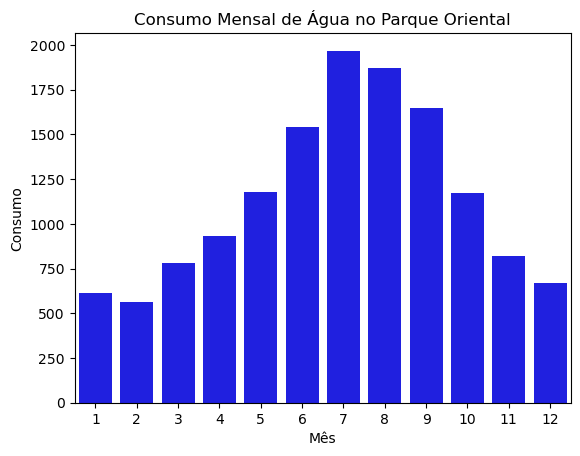

In [8]:
ano = int(input('Digite o ano para o qual pretende o estudo: '))
mesInicio = int(input('Digite o o mês no qual pretende começar o estudo: '))
mesFim = int(input('Digite o mês no qual pretende terminar o estudo: '))
identicacaoParque = (input('Digite a identificação do parque para o qual pretende o estudo: '))

data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Consumption'] = data['Consumption'].astype(str).str.replace(',', '.').astype(float)

dados_filtrados = data[(data['Year'] == ano) & 
                       (data['Month'] >= mesInicio) & 
                       (data['Month'] <= mesFim) & 
                       (data['Park'] == identificacaoParque)]

consumo_mensal = dados_filtrados.groupby('Month')['Consumption'].sum().reset_index()

sns.barplot(x='Month', y='Consumption', data=consumo_mensal, color='blue')
plt.title(f'Consumo Mensal de Água no Parque {identificacaoParque}')
plt.xlabel('Mês')
plt.ylabel('Consumo')
plt.show()

## 3. Análise e Interpretação dos Resultados